In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("LoansTrainingSet.csv")

In [3]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0


In [4]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [6]:
df.nunique()

Loan ID                         215700
Customer ID                     215700
Loan Status                          2
Current Loan Amount              27347
Term                                 2
Credit Score                       334
Years in current job                11
Home Ownership                       4
Annual Income                    60558
Purpose                             10
Monthly Debt                    129115
Years of Credit History            541
Months since last delinquent       131
Number of Open Accounts             59
Number of Credit Problems           12
Current Credit Balance           45704
Maximum Open Credit              87188
Bankruptcies                         8
Tax Liens                           12
dtype: int64

In [7]:
df["Term"].value_counts()

Short Term    192632
Long Term      64352
Name: Term, dtype: int64

In [8]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [9]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


In [10]:
df["Loan Status"].value_counts()

Fully Paid     176191
Charged Off     80793
Name: Loan Status, dtype: int64

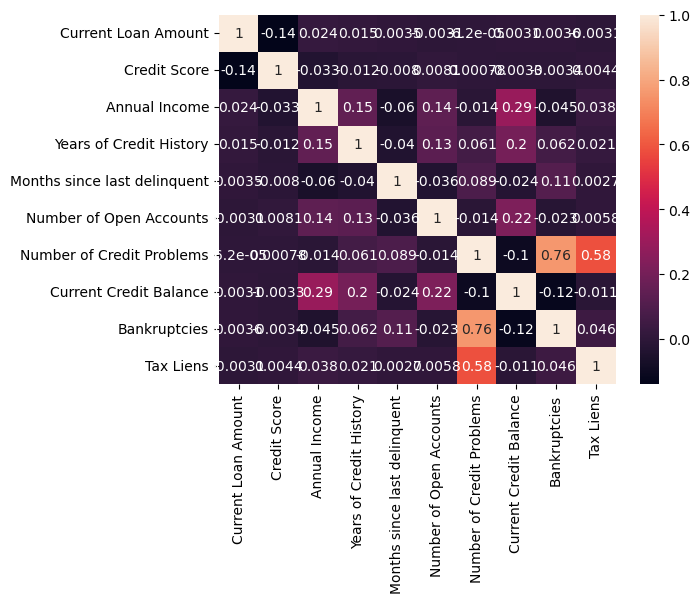

In [11]:
sns.heatmap(df.corr(),annot=True);

In [12]:
df['Credit Score'].fillna(df['Credit Score'].mean(),inplace=True) #ort ile doldurma yaptım

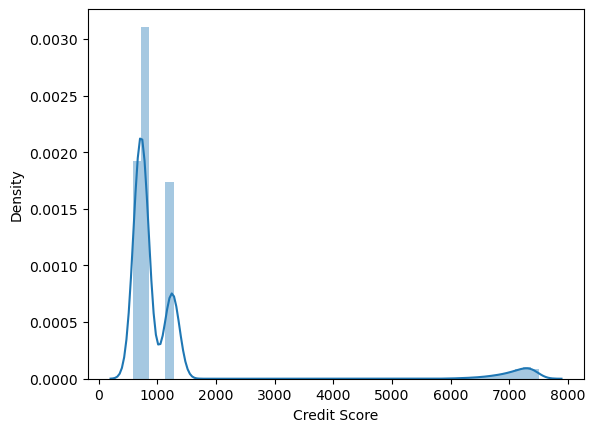

In [13]:
sns.distplot(df['Credit Score']);

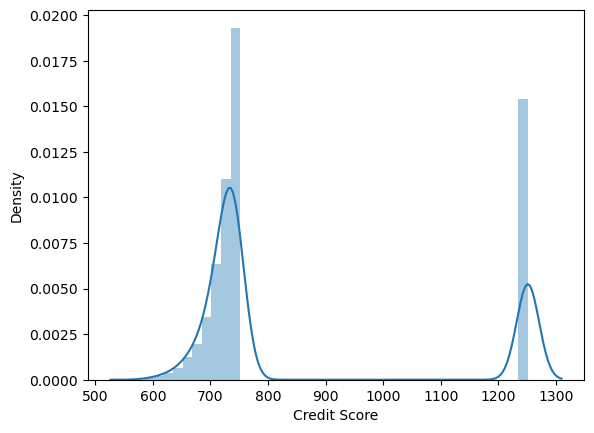

In [14]:
df=df[df['Credit Score']<2000]
sns.distplot(df['Credit Score']); #7000 ler outlier olduğu için 2000 den aşağısını aldım

In [15]:
df['Annual Income'].fillna(df['Annual Income'].mean(),inplace=True) #ort ile doldurdum

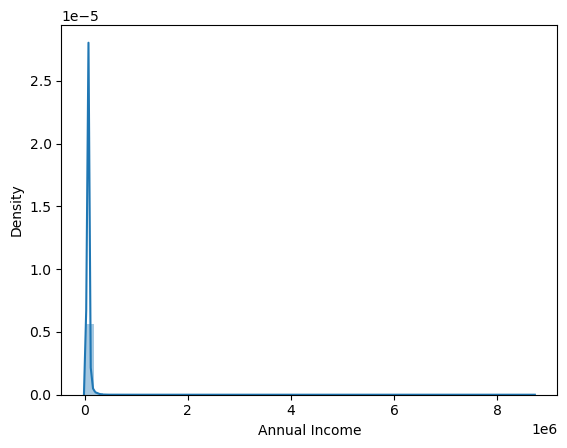

In [16]:
sns.distplot(df['Annual Income']);

In [17]:
#burada outlier yok bu yüzden sınır koymadık

In [18]:
df['Months since last delinquent'].fillna("0",inplace=True) #nulleri 0 yaptım
df['Months since last delinquent']=df['Months since last delinquent'].astype(int) #intt çevirdim

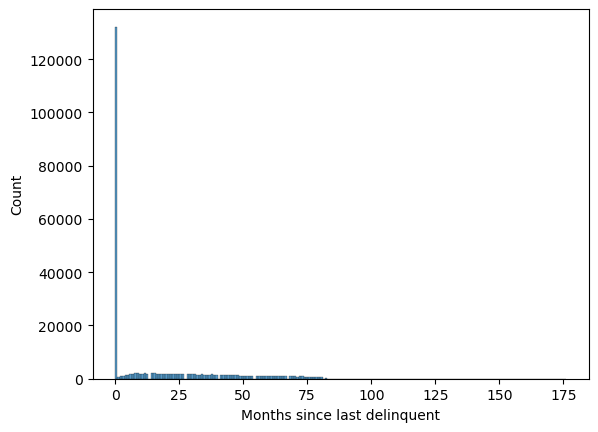

In [19]:
sns.histplot(df['Months since last delinquent']);

In [20]:
df['Months since last delinquent'].value_counts()

0      132189
12       2076
14       2045
15       2042
8        2027
        ...  
149         1
148         1
139         1
122         1
119         1
Name: Months since last delinquent, Length: 131, dtype: int64

In [21]:
df["Months since last delinquent"].unique()

array([ 41,   0,  73,  29,  43,  79,   2,  15,  27,   5,  55,  21,  56,
        25,  67,  37,  74,  45,  76,  46,  35,  60,  28,  34,  13,   7,
        17,  22,  42,  53,  12,  39,  71,  20,  38,  81,  78,  44,  63,
        77,  49,  30,  70,  26,  14,   8,  52,  68,  75,  51,  59,  40,
         4,  18,  47,  24,  31,  69,  32,  36,  16,  10,  62,   9,  11,
        58,  54,   3,  66,  50,  82,  61,  72,  57,  23,  19,  80,   6,
         1,  86,  48,  33,  65,  64,  84,  83, 104,  90, 149,  96, 110,
        99,  91,  95, 152,  87, 131, 100, 116, 106, 107,  85,  89, 101,
       122,  93, 135, 139,  88, 148,  92,  94, 114, 143, 115, 108, 140,
       130,  98,  97, 120, 102, 176, 151, 118, 109, 134, 112, 113, 133,
       119])

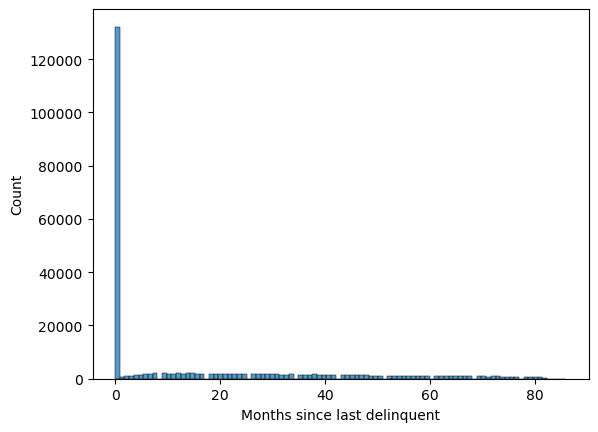

In [22]:
df=df[df['Months since last delinquent']<87]
sns.histplot(df['Months since last delinquent']);

In [23]:
df['Years in current job'].replace('[^0-9]',"",inplace=True,regex=True) #noktalama işaretleri vs kaldır
df['Years in current job'].fillna('0',inplace=True) # null 0 a eşitle
df['Years in current job']=df['Years in current job'].astype(int) 
df['Years in current job']=df['Years in current job'].astype(int)
df['Years in current job'].replace('0',df['Years in current job'].mean(),inplace=True)

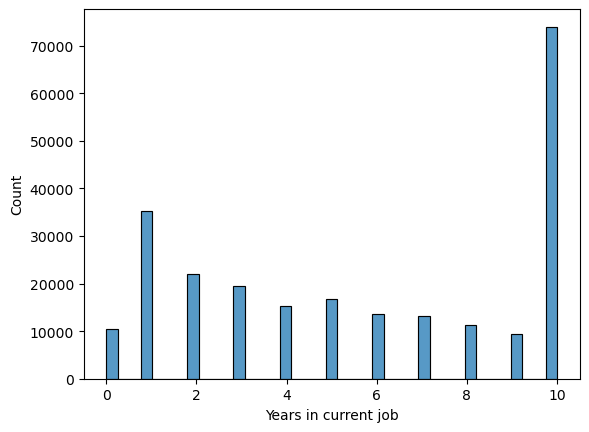

In [24]:
sns.histplot(df['Years in current job']);

In [25]:
df["Maximum Open Credit"].info()

<class 'pandas.core.series.Series'>
Int64Index: 240686 entries, 0 to 256983
Series name: Maximum Open Credit
Non-Null Count   Dtype 
--------------   ----- 
240686 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


In [26]:
df["Maximum Open Credit"].info()

<class 'pandas.core.series.Series'>
Int64Index: 240686 entries, 0 to 256983
Series name: Maximum Open Credit
Non-Null Count   Dtype 
--------------   ----- 
240686 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


In [27]:
df["Maximum Open Credit"].value_counts()

0        1519
0         227
8792       18
15662      17
8589       17
         ... 
37888       1
21559       1
54004       1
17991       1
62371       1
Name: Maximum Open Credit, Length: 86882, dtype: int64

In [28]:
df['Maximum Open Credit'].replace('[a-zA-Z@_!#$%^&*()<>?/\|}{~:]',"0",inplace=True,regex=True)
df['Maximum Open Credit']=df['Maximum Open Credit'].astype(float) #str olduğu için int çevirdik içinde manasız işaretleri kaldırdım

In [29]:
df['Bankruptcies'].fillna("0",inplace=True)

In [30]:
df['Bankruptcies']=df['Bankruptcies'].astype(int)

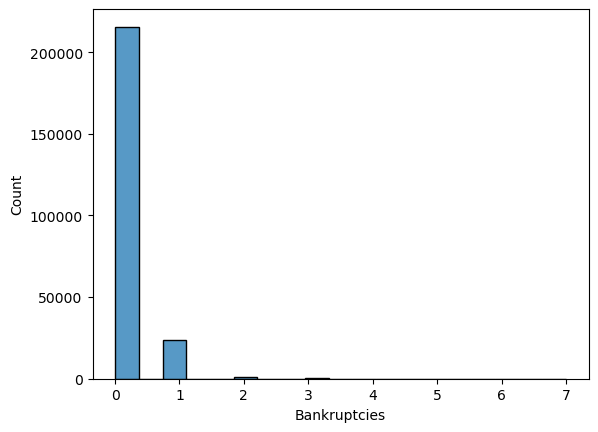

In [31]:
sns.histplot(df['Bankruptcies']);

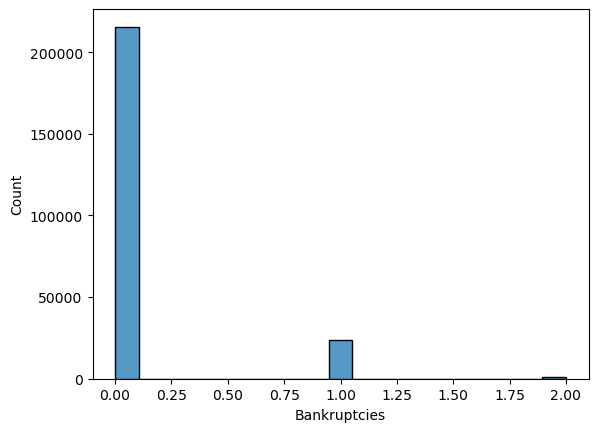

In [32]:
df=df[df['Bankruptcies']<3]
sns.histplot(df['Bankruptcies']);

In [33]:
df['Tax Liens'].fillna("0",inplace=True)
df['Tax Liens']=df['Tax Liens'].astype(int)

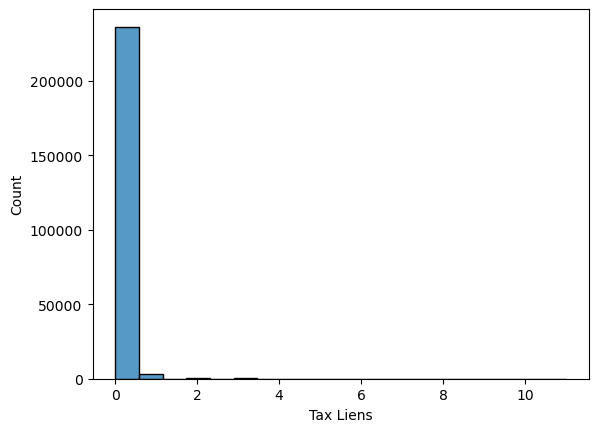

In [34]:
sns.histplot(df['Tax Liens']);

In [35]:
df["Tax Liens"].value_counts()

0     236181
1       3036
2        806
3        223
4        111
5         55
6         27
9          9
8          8
7          6
10         3
11         2
Name: Tax Liens, dtype: int64

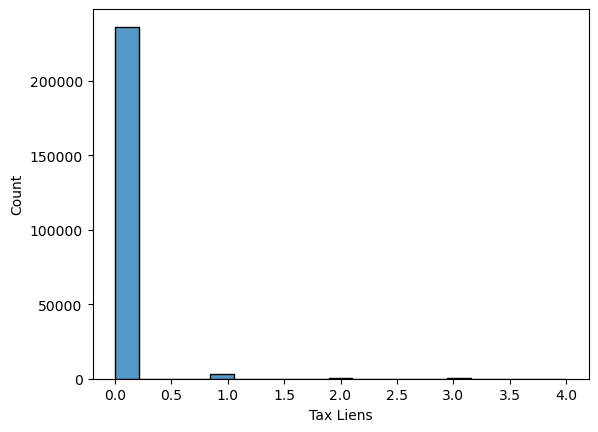

In [36]:
df=df[df['Tax Liens']<5]
sns.histplot(df['Tax Liens']);

In [37]:
df['Monthly Debt'].replace('[^0-9.]','',inplace=True,regex=True)
df['Monthly Debt']=df['Monthly Debt'].astype(float)

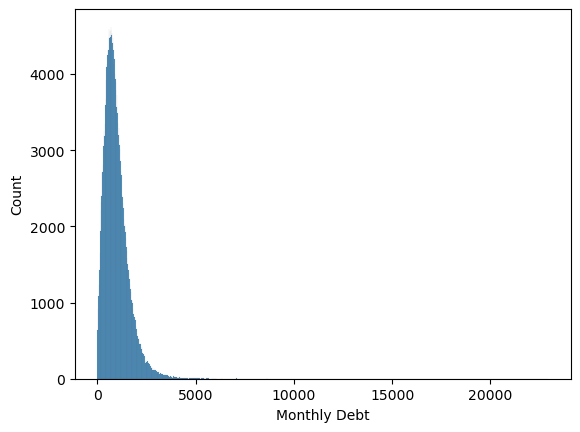

In [38]:
sns.histplot(df['Monthly Debt']);

In [39]:
df["Monthly Debt"].value_counts()

0.00       237
612.74      11
679.66      11
837.00      11
825.38      10
          ... 
1019.93      1
1996.86      1
944.22       1
165.91       1
2525.82      1
Name: Monthly Debt, Length: 128345, dtype: int64

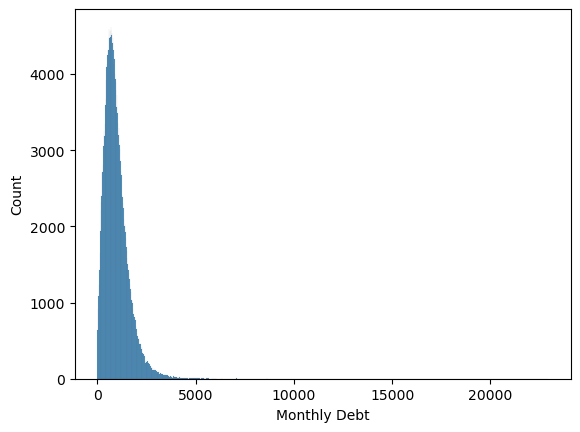

In [40]:
f=df[df['Monthly Debt']<5000]
sns.histplot(df['Monthly Debt']);

In [41]:
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [42]:
df.select_dtypes("object_")

,Loan ID,Customer ID,Loan Status,Term,Home Ownership,Purpose
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,Short Term,Home Mortgage,Debt Consolidation
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,Short Term,Home Mortgage,other
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,Short Term,Home Mortgage,Debt Consolidation
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,Short Term,Own Home,Debt Consolidation
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,Short Term,Rent,Debt Consolidation
...,...,...,...,...,...,...
256978,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,Charged Off,Short Term,Home Mortgage,Debt Consolidation
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,Short Term,Rent,Debt Consolidation
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,Short Term,Own Home,Debt Consolidation
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,Short Term,Home Mortgage,Debt Consolidation


In [43]:
#loan ID ve customer ID sonuca etki etmeyecek bu yüzden droplarız

In [44]:
df['Loan Status'].value_counts()

Fully Paid     175882
Charged Off     64475
Name: Loan Status, dtype: int64

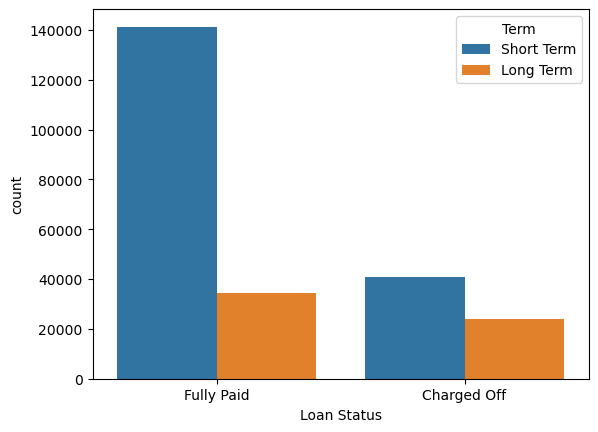

In [47]:
sns.countplot(x=df['Loan Status'],hue=df['Term']);

In [48]:
df['Home Ownership'].value_counts() 

Home Mortgage    117215
Rent             101205
Own Home          21396
HaveMortgage        541
Name: Home Ownership, dtype: int64

In [49]:
df['Home Ownership'].replace(['HaveMortgage','Home Mortgage'],'Mortgage',inplace=True)

In [50]:
df['Home Ownership'].value_counts() 

Mortgage    117756
Rent        101205
Own Home     21396
Name: Home Ownership, dtype: int64

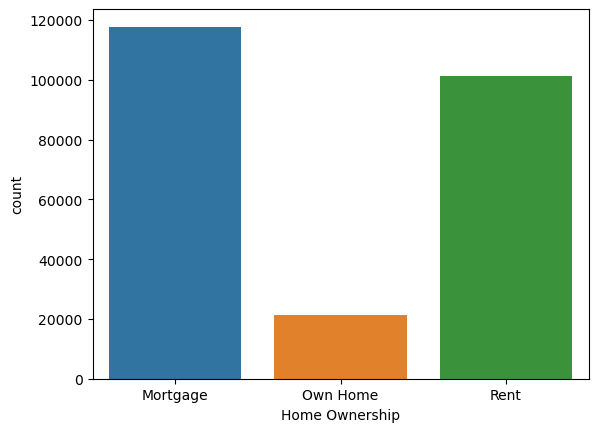

In [53]:
sns.countplot(x=df['Home Ownership']);

In [54]:
df['Purpose'].value_counts()

Debt Consolidation      190697
Home Improvements        14061
other                    13272
Other                     9118
Business Loan             4263
Buy a Car                 3128
Medical Bills             2663
Take a Trip               1474
Buy House                 1428
Educational Expenses       253
Name: Purpose, dtype: int64

In [56]:
df['Purpose'].replace('Other','other',inplace=True)

In [57]:
df['Purpose'].value_counts()

Debt Consolidation      190697
other                    22390
Home Improvements        14061
Business Loan             4263
Buy a Car                 3128
Medical Bills             2663
Take a Trip               1474
Buy House                 1428
Educational Expenses       253
Name: Purpose, dtype: int64

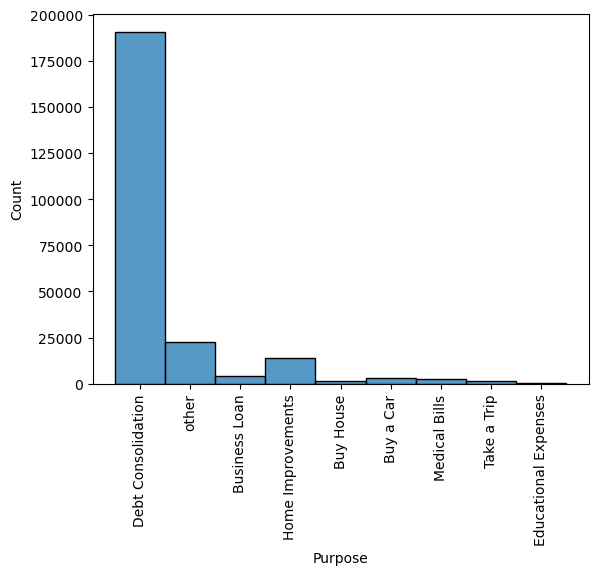

In [58]:
sns.histplot(df['Purpose']);
plt.xticks(rotation=90);

In [59]:
df=df.drop(['Loan ID','Customer ID'],axis=1)

In [60]:
df

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,11520,Short Term,741.000000,10,Mortgage,33694.000000,Debt Consolidation,584.03,12.3,41,10,0,6760,16056.0,0,0
1,Fully Paid,3441,Short Term,734.000000,4,Mortgage,42269.000000,other,1106.04,26.3,0,17,0,6262,19149.0,0,0
2,Fully Paid,21029,Short Term,747.000000,10,Mortgage,90126.000000,Debt Consolidation,1321.85,28.8,0,5,0,20967,28335.0,0,0
3,Fully Paid,18743,Short Term,747.000000,10,Own Home,38072.000000,Debt Consolidation,751.92,26.2,0,9,0,22529,43915.0,0,0
4,Fully Paid,11731,Short Term,746.000000,4,Rent,50025.000000,Debt Consolidation,355.18,11.5,0,12,0,17391,37081.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256978,Charged Off,11953,Short Term,717.000000,10,Mortgage,39844.000000,Debt Consolidation,982.82,11.7,0,9,1,4176,4783.0,1,0
256979,Fully Paid,3911,Short Term,1251.116099,2,Rent,72535.550103,Debt Consolidation,1706.58,19.9,0,16,0,43992,44080.0,0,0
256980,Fully Paid,5078,Short Term,737.000000,10,Own Home,77186.000000,Debt Consolidation,1376.47,19.1,47,9,0,1717,9758.0,0,0
256982,Charged Off,12116,Short Term,746.000000,9,Mortgage,52504.000000,Debt Consolidation,297.96,15.1,82,8,0,3315,20090.0,0,0


In [61]:
x=df.drop('Loan Status',axis=1)
y=df[['Loan Status']]

In [62]:
x=pd.get_dummies(x,drop_first=True)
y=pd.get_dummies(y,drop_first=True)

In [63]:
y.shape,x.shape

((240357, 1), (240357, 24))

In [66]:
!pip install xgboost

     -------------------------------------- 70.9/70.9 MB 912.8 kB/s eta 0:00:00


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    g=GaussianNB()
    b=BernoulliNB()
    SVC=SVC()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGBC=XGBClassifier()
    
    algos=[g,b,SVC,KN,D,R,Log,XGBC]
    algo_names=['GaussianNB','BernoulliNB','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
        
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result.f1_score=f1_scored
    result.recall_score=recall_scored
    result.precision_score=precision_scored
    result.accuracy_score=accuracy_scored
    classification_funct.result=result.sort_values('f1_score',ascending=False)
    return result.sort_values('f1_score',ascending=False)  
    

In [71]:
classification_funct(x,y)

(192285, 24) (48072, 24) (192285, 1) (48072, 1)


,f1_score,recall_score,precision_score,accuracy_score
RandomForestClassifier,0.889292,0.950185,0.835734,0.827509
XGBClassifier,0.845358,0.930328,0.774610,0.751831
BernoulliNB,0.843399,0.997689,0.730438,0.729864
SVC,0.843339,1.000000,0.729115,0.729115
LogisticRegression,0.843052,0.999287,0.729065,0.728719
DecisionTreeClassifier,0.821140,0.799914,0.843522,0.745923
KNeighborsClassifier,0.804216,0.843509,0.768421,0.700553
GaussianNB,0.339812,0.204765,0.998053,0.419891
